# Analysis and visualization of 3D data in Python

Daniela Ushizima, Alexandre de Siqueira, Stéfan van der Walt\
14th International Symposium on Visual Computing\
Lake Tahoe, NV, USA\
October 7-9, 2019

```
Copyright (C) 2019, Daniela Ushizima, Alexandre de Siqueira and Stéfan van der Walt
All rights reserved.

Redistribution and use in source and binary forms, with or without
modification, are permitted provided that the following conditions are
met:

 1. Redistributions of source code must retain the above copyright
    notice, this list of conditions and the following disclaimer.
 2. Redistributions in binary form must reproduce the above copyright
    notice, this list of conditions and the following disclaimer in
    the documentation and/or other materials provided with the
    distribution.
 3. Neither the name of skimage nor the names of its contributors may be
    used to endorse or promote products derived from this software without
    specific prior written permission.

THIS SOFTWARE IS PROVIDED BY THE AUTHOR ``AS IS'' AND ANY EXPRESS OR
IMPLIED WARRANTIES, INCLUDING, BUT NOT LIMITED TO, THE IMPLIED
WARRANTIES OF MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE ARE
DISCLAIMED. IN NO EVENT SHALL THE AUTHOR BE LIABLE FOR ANY DIRECT,
INDIRECT, INCIDENTAL, SPECIAL, EXEMPLARY, OR CONSEQUENTIAL DAMAGES
(INCLUDING, BUT NOT LIMITED TO, PROCUREMENT OF SUBSTITUTE GOODS OR
SERVICES; LOSS OF USE, DATA, OR PROFITS; OR BUSINESS INTERRUPTION)
HOWEVER CAUSED AND ON ANY THEORY OF LIABILITY, WHETHER IN CONTRACT,
STRICT LIABILITY, OR TORT (INCLUDING NEGLIGENCE OR OTHERWISE) ARISING
IN ANY WAY OUT OF THE USE OF THIS SOFTWARE, EVEN IF ADVISED OF THE
POSSIBILITY OF SUCH DAMAGE.
```

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import supplementary_code as sc

from ipywidgets import interact
from matplotlib import cm
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection
from scipy import ndimage as ndi
from scipy import stats

from skimage import (color, exposure, feature, filters, io, measure,
                     morphology, restoration, segmentation, transform,
                     util)

%matplotlib inline

# scikit-image: a tour

There are many tools and utilities in scikit-image, far too many to cover in a tutorial. This section is designed as a 
road map, to guide you as you explore or search for additional tools for your applications.

Each of the 15 submodule of scikit-image has its own section, which you can navigate to below:

* [skimage.color](#color)
* [skimage.data](#data)
* [skimage.draw](#draw)
* [skimage.exposure](#exposure)
* [skimage.feature](#feature)
* [skimage.filters](#filters)
* [skimage.future](#future)
* [skimage.graph](#graph)
* [skimage.io](#io)
* [skimage.measure](#measure)
* [skimage.morphology](#morphology)
* [skimage.restoration](#restoration)
* [skimage.segmentation](#segmentation)
* [skimage.transform](#transform)
* [skimage.util](#util)

## [skimage.color](https://scikit-image.org/docs/stable/api/skimage.color.html) - color conversion<a id='color'></a>

The `color` submodule includes routines to convert to and from common color representations. For example, the RGB color   model (based on **R**ed, **G**reen, and **B**lue) can be converted into many other representations using functions contained in `color`.

## [skimage.data](https://scikit-image.org/docs/stable/api/skimage.data.html) - test images<a id='data'></a>

The `data` submodule includes standard test images useful for examples and testing the package. Scientific images, general test images, and a stereoscopic image are shipped with scikit-image.

## [skimage.draw](https://scikit-image.org/docs/stable/api/skimage.draw.html) - drawing primitives on an image<a id='draw'></a>

The majority of functions in `draw` return the *coordinates* of the specified shape/object in the image, rather than drawing it on the image directly. The coordinates can then be used as a mask to draw on the image, or you pass the image as well as those coordinates into the convenience function `draw.set_color`.

Lines and circles can be drawn with antialiasing (these functions end in the suffix `*_aa`).

At the current time text is not supported; other libraries, such as matplotlib, have robust support for overlaying text in images.

## [skimage.exposure](https://scikit-image.org/docs/stable/api/skimage.exposure.html) - evaluating or changing the exposure of an image<a id='exposure'></a>

One of the most common tools to evaluate exposure is the *histogram*, which plots the number of points which have a certain value against the values in order from lowest (dark) to highest (light).  The function `exposure.histogram` differs from `numpy.histogram` in that there is no rebinnning; each value along the x-axis is preserved.

## [skimage.feature](https://scikit-image.org/docs/stable/api/skimage.feature.html) - extract features from an image<a id='feature'></a>

This submodule presents a diverse set of tools to identify or extract certain features from images, including tools for

* Edge detection: `feature.canny`
* Corner detection:
  * `feature.corner_kitchen_rosenfeld`
  * `feature.corner_harris`
  * `feature.corner_shi_tomasi`
  * `feature.corner_foerstner`
  * `feature.subpix`
  * `feature.corner_moravec`
  * `feature.corner_fast`
  * `feature.corner_orientations`
* Blob detection
  * `feature.blob_dog`
  * `feature.blob_doh`
  * `feature.blob_log`
* Texture
  * `feature.greycomatrix`
  * `feature.greycoprops`
  * `feature.local_binary_pattern`
  * `feature.multiblock_lbp`
* Peak finding: `feature.peak_local_max`
* Object detection
  * `feature.hog`
  * `feature.match_template`
* Stereoscopic depth estimation: `feature.daisy`
* Feature matching
  * `feature.ORB`
  * `feature.BRIEF`
  * `feature.CENSURE`
  * `feature.match_descriptors`
  * `feature.plot_matches`


## [skimage.filters](https://scikit-image.org/docs/stable/api/skimage.filters.html) - apply filters to an image<a id='filters'></a>

Filtering applies whole-image modifications such as sharpening or blurring.  Thresholding methods also live in this submodule.

Notable functions include (links to relevant gallery examples):

* [Thresholding](https://scikit-image.org/docs/stable/auto_examples/applications/plot_thresholding.html):
  * `filters.threshold_*` (multiple different functions with this prefix)
  * `filters.try_all_threshold` to compare various methods
* [Edge finding/enhancement](https://scikit-image.org/docs/stable/auto_examples/edges/plot_edge_filter.html):
  * `filters.sobel`
  * `filters.prewitt`
  * `filters.scharr`
  * `filters.roberts`
  * `filters.laplace`
  * `filters.hessian`
* [Ridge filters](https://scikit-image.org/docs/stable/auto_examples/edges/plot_ridge_filter.html):
  * `filters.meijering`
  * `filters.sato`
  * `filters.frangi`
* Inverse filtering (see also [skimage.restoration](#restoration)):
  * `filters.weiner`
  * `filters.inverse`
* [Directional](https://scikit-image.org/docs/stable/auto_examples/features_detection/plot_gabor.html): `filters.gabor`
* Blurring/denoising
  * `filters.gaussian`
  * `filters.median`
* [Sharpening](https://scikit-image.org/docs/stable/auto_examples/filters/plot_unsharp_mask.html): `filters.unsharp_mask`
* Define your own filter: `LPIFilter2D`
  
The sub-submodule `skimage.filters.rank` contains rank filters. These filters are nonlinear and operate on the local histogram.

## [skimage.future](https://scikit-image.org/docs/stable/api/skimage.future.html) - stable code with unstable API<a id='future'></a>

Bleeding edge features which work well, and will be moved from here into the main package in future releases.  However, on the way their API may change.

## [skimage.graph](https://scikit-image.org/docs/stable/api/skimage.graph.html) - graph theory, minimum cost paths<a id='graph'></a>

Graph theory. Currently this submodule primarily deals with a constructed "cost" image, and how to find the minimum cost path through it, with constraints if desired. The [panorama tutorial](./solutions/adv3_panorama-stitching-solution.ipynb) lecture illustrates a real-world example.

## [skimage.io](https://scikit-image.org/docs/stable/api/skimage.io.html) - utilities to read and write images in various formats<a id='io'></a>

Reading your image and writing the results back out.  There are multiple plugins available, which support multiple formats.  The most commonly used functions include

* `io.imread` - Read an image to a numpy array.
* `io.imsave` - Write an image to disk.
* `io.imread_collection` - Read multiple images which match a common prefix.

## <a id='measure'></a>[skimage.measure](https://scikit-image.org/docs/stable/api/skimage.measure.html) - measuring image or region properties

Multiple algorithms to label images, or obtain information about discrete regions of an image.

* `measure.label` - Label an image, i.e. identify discrete regions in the image using unique integers.
* `measure.regionprops` - In a labeled image, as returned by `label`, find various properties of the labeled regions.

Finding paths from a 2D image, or isosurfaces from a 3D image.

* `measure.find_contours`
* `measure.marching_cubes_lewiner`
* `measure.marching_cubes_classic`
* `measure.mesh_surface_area` - Surface area of 3D mesh from marching cubes.
* `measure.compare_*` - Quantify the difference between two whole images; often used in denoising or restoration.

**RANDom Sample Consensus fitting (RANSAC)** - a powerful, robust approach to fitting a model to data.  It exists here because its initial use was for fitting shapes, but it can also fit transforms.
* `measure.ransac`
* `measure.CircleModel`
* `measure.EllipseModel`
* `measure.LineModelND`

## <a id='morphology'></a>[skimage.morphology](https://scikit-image.org/docs/stable/api/skimage.morphology.html) - binary and grayscale morphology

Morphological image processing is a collection of non-linear operations related to the shape or morphology of features in an image, such as boundaries, skeletons, etc. In any given technique, we probe an image with a small shape or template called a structuring element, which defines the region of interest or neighborhood around a pixel.

## [skimage.restoration](https://scikit-image.org/docs/stable/api/skimage.restoration.html) - restoration of an image<a id='restoration'></a>

This submodule includes routines to restore images.  Currently these routines fall into four major categories.  Links lead to topical gallery examples.

* `restoration.denoise_*` - [Reducing noise](https://scikit-image.org/docs/stable/auto_examples/filters/plot_denoise.html).
* [Deconvolution](https://scikit-image.org/docs/stable/auto_examples/filters/plot_deconvolution.html), or reversing a convolutional effect which applies to the entire image. This can be done in an [unsupervised](https://scikit-image.org/docs/stable/auto_examples/filters/plot_restoration.html) way.
  * `restoration.weiner`
  * `restoration.unsupervised_weiner`
  * `restoration.richardson_lucy`
* `restoration.inpaint_biharmonic` - [Inpainting](https://scikit-image.org/docs/stable/auto_examples/filters/plot_inpaint.html), or filling in missing areas of an image.
* `restoration.unwrap_phase` - [Phase unwrapping](https://scikit-image.org/docs/stable/auto_examples/filters/plot_phase_unwrap.html).

## <a id='segmentation'></a>[skimage.segmentation](https://scikit-image.org/docs/stable/api/skimage.segmentation.html) - identification of regions of interest

One of the key image analysis tasks is identifying regions of interest.  These could be a person, an object, certain features of an animal, microscopic image, or stars.  Segmenting an image is the process of determining where these things you want are in your images.

Segmentation has two overarching categories:

**Supervised** - must provide some guidance (seed points or initial conditions)

* `segmentation.random_walker`
* `segmentation.active_contour`
* `segmentation.watershed`
* `segmentation.flood_fill`
* `segmentation.flood`

**Unsupervised** - no human input

* `segmentation.slic`
* `segmentation.felzenszwalb`
* `segmentation.chan_vese`

There are also some supervised and unsupervised thresholding algorithms in `filters`.

There is a [segmentation lecture](./4_segmentation.ipynb) ([and its solution](./solutions/4_segmentation.ipynb)) you may peruse, as well as many [gallery examples](https://scikit-image.org/docs/stable/auto_examples/index.html#segmentation-of-objects) which illustrate all of these segmentation methods.

## [skimage.transform](https://scikit-image.org/docs/stable/api/skimage.transform.html) - transforms & warping<a id='transform'></a>

This submodule has multiple features which fall under the umbrella of transformations.

Forward (`radon`) and inverse (`iradon`) radon transforms, as well as some variants (`iradon_sart`) and the finite versions of these transforms (`frt2` and `ifrt2`).  These are used for [reconstructing medical computed tomography (CT) images](https://scikit-image.org/docs/stable/auto_examples/transform/plot_radon_transform.html).

Hough transforms for identifying lines, circles, and ellipses.

Changing image size, shape, or resolution with `resize`, `rescale`, or `downscale_local_mean`.

`warp`, and `warp_coordinates` which take an image or set of coordinates and translate them through one of the defined `*Transforms` in this submodule.  `estimate_transform` may be assist in estimating the parameters.

[Numerous gallery examples are available](https://scikit-image.org/docs/stable/auto_examples/index.html#geometrical-transformations-and-registration) illustrating these functions.  [The panorama tutorial also includes warping](./solutions/adv3_panorama-stitching-solution.ipynb) via `SimilarityTransform` with parameter estimation via `measure.ransac`.

## [skimage.util](https://scikit-image.org/docs/stable/api/skimage.util.html) - utility functions<a id='util'></a>

These are generally useful functions which have no definite other place in the package.

* `util.img_as_*` are convenience functions for datatype conversion.

* `util.invert` is a convenient way to invert any image, accounting for its datatype.

* `util.random_noise` is a comprehensive function to apply any amount of many different types of noise to images.  The seed may be set, resulting in pseudo-random noise for testing.

* `util.view_as_*` allows for overlapping views into the same memory array, which is useful for elegant local computations with minimal memory impact.

* `util.apply_parallel` uses Dask to apply a function across subsections of an image.  This can result in dramatic performance or memory improvements, but depending on the algorithm edge effects or lack of knowledge of the remainder of the image may result in unexpected results.

* `util.pad` and `util.crop` pads or crops the edges of images.  `util.pad` is now a direct wrapper for `numpy.pad`.

# Introduction to three-dimensional image processing

Images are represented as `numpy` arrays. A single-channel, or grayscale, image is a 2D matrix of pixel intensities of shape `(row, column)`. We can construct a 3D volume as a series of 2D `planes`, giving 3D images the shape `(plane, row, column)`. Multichannel data adds a `channel` dimension in the final position containing color information. 

These conventions are summarized in the following table:

|Image type|Coordinates|
|:---|:---|
|2D grayscale|(row, column)|
|2D multichannel|(row, column, channel)|
|3D grayscale|(plane, row, column)|
|3D multichannel|(plane, row, column, channel)|

Some 3D images are constructed with equal resolution in each dimension; e.g., a computer generated rendering of a sphere. Most experimental data captures one dimension at a lower resolution than the other two; e.g., photographing thin slices to approximate a 3D structure as a stack of 2D images.

## Input/Output and display

Three dimensional data can be loaded with `io.imread`, as in the following example. This data was provided by the Allen Institute for Cell Science. First let's check its shape, data type and range.

In [2]:
data = io.imread('images/cells.tif')

print('* Data shape: {}'.format(data.shape))
print('* Data type: {}'.format(data.dtype))
print('* Data range: {}, {}'.format(data.min(), data.max()))

* Data shape: (60, 256, 256)
* Data type: float64
* Data range: 0.0, 1.0


We see that `data` has 60 planes, each with 256 rows and 256 columns. Let's try visualizing the image with `skimage.io.imshow`.

Invalid dimensions for image data


/Users/dani/anaconda3/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


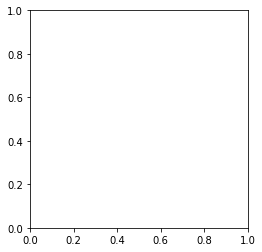

In [3]:
try:
    io.imshow(data, cmap='gray')
except TypeError as e:
    print(str(e))

`skimage.io.imshow` can only display grayscale and RGB(A) 2D images. We can use `skimage.io.imshow` to visualize 2D planes. By fixing one axis, we can observe three different views of the image. Let's use the helper function `show_plane` to do that.

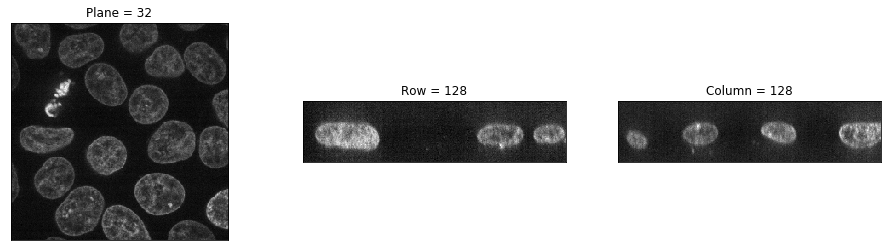

In [4]:
_, (a, b, c) = plt.subplots(nrows=1, ncols=3, figsize=(16, 4))

sc.show_plane(a, data[32], title='Plane = 32')
sc.show_plane(b, data[:, 128, :], title='Row = 128')
sc.show_plane(c, data[:, :, 128], title='Column = 128')

Three-dimensional images can be viewed as a series of two-dimensional ones. The `slice_explorer` helper presents a slider to check the 2D planes.

In [5]:
sc.slice_explorer(data)

interactive(children=(IntSlider(value=34, description='plane', max=59), Output()), _dom_classes=('widget-inter…

<function supplementary_code.slice_explorer.<locals>.display_slice>

The `display` helper function, on the other hand, displays 30 planes of the provided image. By default, every other plane is displayed.

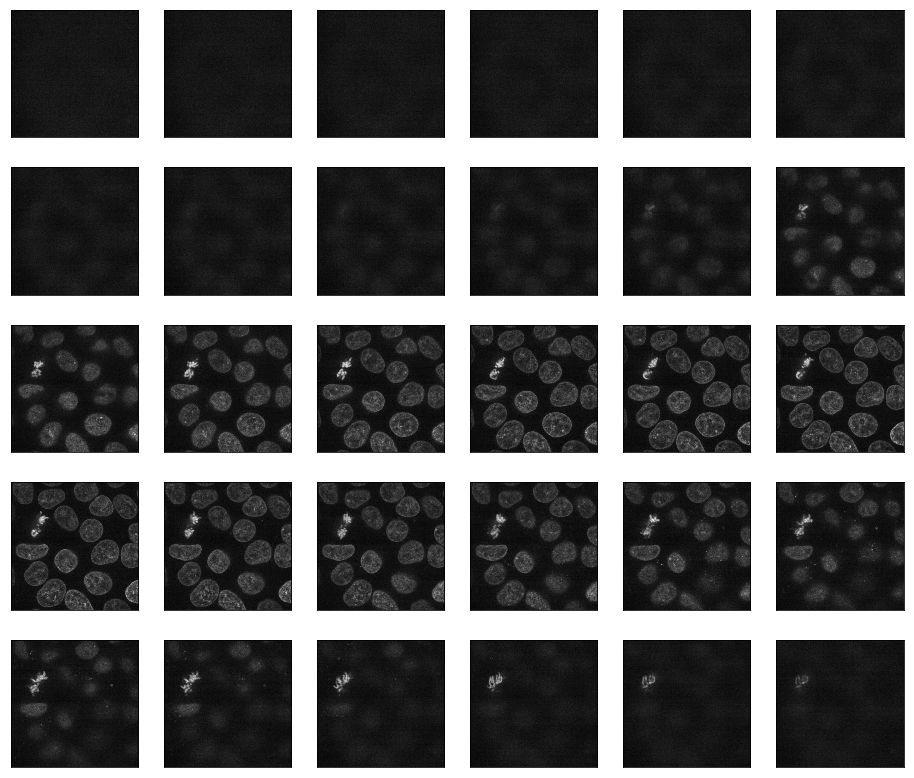

In [6]:
sc.display(data)

## Exposure

`skimage.exposure` contains a number of functions for adjusting image contrast. These functions operate on pixel values. Generally, image dimensionality or pixel spacing does not need to be considered.

[Gamma correction](https://en.wikipedia.org/wiki/Gamma_correction), also known as Power Law Transform, brightens or darkens an image. The function $O = I^\gamma$ is applied to each pixel in the image. A `gamma < 1` will brighten an image, while a `gamma > 1` will darken an image. 

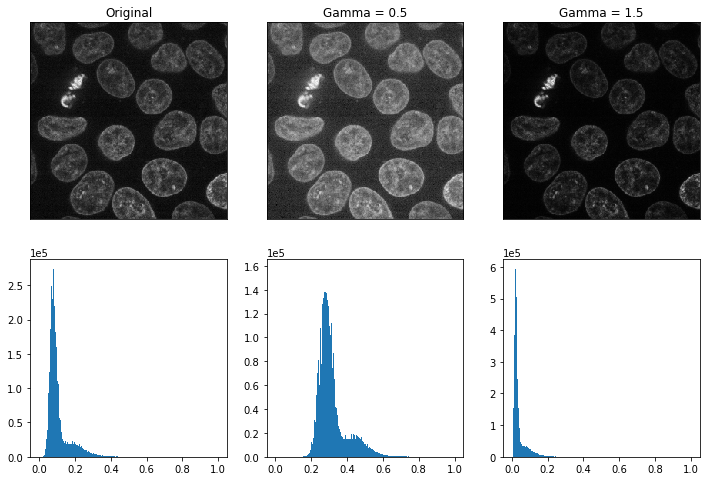

In [7]:
gamma_low_val = 0.5
gamma_low = exposure.adjust_gamma(data, gamma=gamma_low_val)

gamma_high_val = 1.5
gamma_high = exposure.adjust_gamma(data, gamma=gamma_high_val)

_, ((a, b, c), (d, e, f)) = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

# Original and its histogram.
sc.show_plane(a, data[32], title='Original')
sc.plot_hist(d, data)

# Gamma = 0.5 and its histogram.
sc.show_plane(b, gamma_low[32], title='Gamma = {}'.format(gamma_low_val))
sc.plot_hist(e, gamma_low)

# Gamma = 1.5 and its histogram.
sc.show_plane(c, gamma_high[32], title='Gamma = {}'.format(gamma_high_val))
sc.plot_hist(f, gamma_high)

[Histogram equalization](https://en.wikipedia.org/wiki/Histogram_equalization) improves contrast in an image by redistributing pixel intensities. The most common pixel intensities are spread out, allowing areas of lower local contrast to gain a higher contrast. This may enhance background noise.

interactive(children=(IntSlider(value=34, description='plane', max=59), Output()), _dom_classes=('widget-inter…

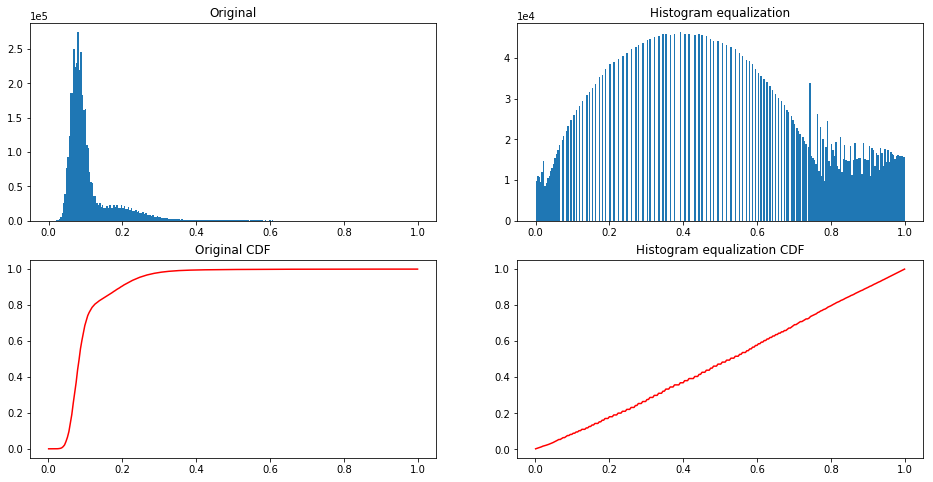

In [8]:
equalized = exposure.equalize_hist(data)

sc.slice_explorer(equalized)

_, ((a, b), (c, d)) = plt.subplots(nrows=2, ncols=2, figsize=(16, 8))

sc.plot_hist(a, data, title='Original')
sc.plot_hist(b, equalized, title='Histogram equalization')

cdf, bins = exposure.cumulative_distribution(data.ravel())
c.plot(bins, cdf, 'r')
c.set_title('Original CDF')

cdf, bins = exposure.cumulative_distribution(equalized.ravel())
d.plot(bins, cdf, 'r')
d.set_title('Histogram equalization CDF');

Most experimental images are affected by salt and pepper noise. A few bright artifacts can decrease the relative intensity of the pixels of interest. A simple way to improve contrast is to clip the pixel values on the lowest and highest extremes. Clipping the darkest and brightest 0.5% of pixels will increase the overall contrast of the image.

In [9]:
vmin, vmax = stats.scoreatpercentile(data, (0.5, 99.5))

clipped = exposure.rescale_intensity(
    data, 
    in_range=(vmin, vmax), 
    out_range=np.float32
)

sc.slice_explorer(clipped);

interactive(children=(IntSlider(value=34, description='plane', max=59), Output()), _dom_classes=('widget-inter…

We'll call our dataset `rescaled` from now on. In this cell, you can choose any of the previous results to continue working with.

In the next steps, we'll use the `clipped` version.

In [10]:
rescaled = clipped